# Simple LSTM
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [88]:
df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [89]:
df = df.drop(['High','Low','Adj Close','Volume','Close'], axis=1)
df.head()

,Open
Date,
2022-01-22,36471.589844
2022-01-23,35047.359375
2022-01-24,36275.734375
2022-01-25,36654.804688
2022-01-26,36950.515625


In [90]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[36471.589844],
       [35047.359375],
       [36275.734375],
       [36654.804688],
       [36950.515625]])

### plotting data

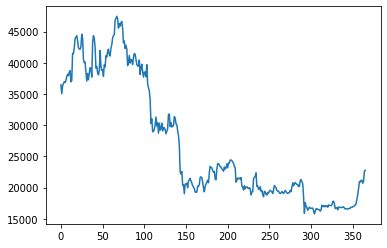

In [91]:
plt.plot(dataset)
plt.show()

### normalizing data

In [92]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.65318238]
 [0.60821794]
 [0.64699902]
 [0.65896666]
 [0.66830256]] 

(366, 1)


### Method for making data and timestep

In [95]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),0])
        data_y.append(dataset[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [96]:
train_size = int(len(dataset) * 0.90)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(329, 1)
(37, 1)


In [97]:
train[:3]

array([[0.65318238],
       [0.60821794],
       [0.64699902]])

### Making data train & test x,y

In [98]:
n_steps = 5 #timestep or look_up

train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

In [99]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(323, 5) (323,)
(31, 5) (31,)


In [100]:
train_y[:3]

array([0.66487279, 0.67391999, 0.69451282])

In [101]:
for i in range(len(test_x)):   
    print(test_x[i],test_y[i])

# print(train_x[:5],'\n')
# print(train_y[:5])

[0.0272989  0.03199121 0.03083671 0.02082067 0.03542986] 0.032710125925499434
[0.03199121 0.03083671 0.02082067 0.03542986 0.03271013] 0.03306573176845201
[0.03083671 0.02082067 0.03542986 0.03271013 0.03306573] 0.032034370033292625
[0.02082067 0.03542986 0.03271013 0.03306573 0.03203437] 0.0336296324750503
[0.03542986 0.03271013 0.03306573 0.03203437 0.03362963] 0.03346369953860345
[0.03271013 0.03306573 0.03203437 0.03362963 0.0334637 ] 0.035895964561643845
[0.03306573 0.03203437 0.03362963 0.0334637  0.03589596] 0.029490496457610538
[0.03203437 0.03362963 0.0334637  0.03589596 0.0294905 ] 0.024310379356305034
[0.03362963 0.0334637  0.03589596 0.0294905  0.02431038] 0.027120448578457468
[0.0334637  0.03589596 0.0294905  0.02431038 0.02712045] 0.02593160159110902
[0.03589596 0.0294905  0.02431038 0.02712045 0.0259316 ] 0.024171207801618355
[0.0294905  0.02431038 0.02712045 0.0259316  0.02417121] 0.02662098487030512
[0.02431038 0.02712045 0.0259316  0.02417121 0.02662098] 0.02862062794

### Converting data to three-dimensional or three-channel
- The input must be three-dimensional or three-channel, that's why we reshape it


In [102]:
trainxr = np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
testxr = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

print(trainxr.shape)
print(testxr.shape)

(323, 5, 1)
(31, 5, 1)


In [103]:
train_x = trainxr
test_x = testxr

### training model

In [105]:
n_features = 1 
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_steps, n_features)))  
model.add(Dense(1)) #n-output  
model.compile(optimizer='adam',loss='mse')   
# model.summary()

In [23]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)

Epoch 1/50
162/162 [==============================] - 5s 11ms/step - loss: 0.0581
Epoch 2/50
162/162 [==============================] - 2s 11ms/step - loss: 0.0119
Epoch 3/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0087
Epoch 4/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0062
Epoch 5/50
162/162 [==============================] - 2s 15ms/step - loss: 0.0049
Epoch 6/50
162/162 [==============================] - 3s 17ms/step - loss: 0.0045
Epoch 7/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0043
Epoch 8/50
162/162 [==============================] - 2s 11ms/step - loss: 0.0042
Epoch 9/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0043
Epoch 10/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0043
Epoch 11/50
162/162 [==============================] - 2s 10ms/step - loss: 0.0047
Epoch 12/50
162/162 [==============================] - 3s 17ms/step - loss: 0.0048
Epoch 13/50
1

### saving model

In [25]:
model.save('/content/drive/MyDrive/savedata')

In [26]:
# loading model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/savedata')

### Testing model

In [106]:
predict_train = new_model.predict(train_x)
predict_test = new_model.predict(test_x)
print('predicted y(train):', np.reshape(predict_train[:5],-1))
print('real y(train):', train_y[:5])

1/1 [==============================] - 0s 75ms/step
predicted y(train): [0.5678265  0.56865    0.5744151  0.5876969  0.59756374]
real y(train): [0.66487279 0.67391999 0.69451282 0.70623209 0.69891907]


In [107]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform([test_y])

In [108]:
print(predict_train[:5])

[[33767.977]
 [33794.06 ]
 [33976.664]
 [34397.363]
 [34709.89 ]]


### creating df and plotting

In [109]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,33767.976562,36841.878906
1,33794.058594,37128.445313
2,33976.664062,37780.714844
3,34397.363281,38151.917969
4,34709.890625,37920.281250


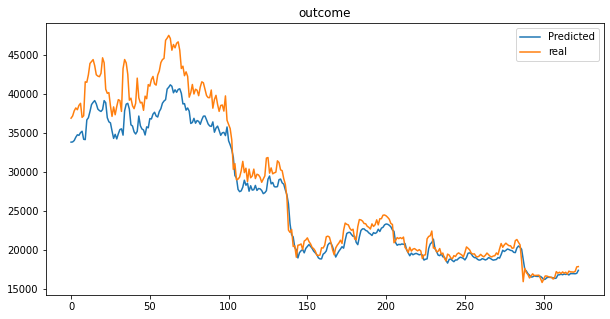

In [110]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [126]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [111]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,16633.142578,16818.380859
1,16646.205078,16829.644531
2,16654.000000,16796.976563
3,16643.128906,16847.505859
4,16663.453125,16842.250000


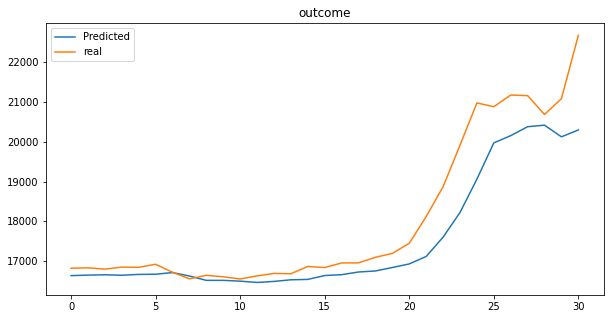

In [112]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [113]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 167ms/step - loss: 0.0085


0.008512858301401138

In [114]:
train_score = math.sqrt(mean_squared_error(trainy.reshape(-1),predict_train))
print('rmse ', train_score)
test_score = math.sqrt(mean_squared_error(test_y.reshape(-1),predict_test))
print('rmse ', test_score)

rmse  2649.3978892712557
rmse  17563.538958516638


### new testing
- we must change dim

In [60]:
test_x.shape , test_y.shape

((31, 5, 1), (31,))

In [66]:
test_ = array([0.0272989,  0.03199121, 0.03083671, 0.02082067, 0.03542986])
test_ = test_.reshape(1,n_steps,n_features)
test_.shape

(1, 5, 1)

In [67]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 27ms/step


array([[0.02686197]], dtype=float32)

In [68]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[16633.143]], dtype=float32)